# Day 2: Exercises from the course "Machine Vision using Python (MVUP01)"

**Sessions**: (5) Neural Networks: From Basics to Backpropagation; (6)Convolutional Neural Networks (CNNs) for Image Classification.

**Instructor**: Gabriel Rodrigues Palma

**Objective**: This day focuses on the theoretical foundations of deep learning from Neural Networks to Convolutional Neural Networks (CNNs).

# Session 5: Neural Networks, from Basics to Backpropagation

## The perceptrom algorithm

In [1]:
import numpy as np

def activation(net, epsilon=0.5):
    """
    Activation function that returns 1 if net > epsilon, else returns 0.
    """
    return 1 if net > epsilon else 0

In [2]:
n_features = 2
weights = np.random.uniform(low=-0.5, high=0.5, size = n_features + 1)

In [3]:
weights

array([0.39273668, 0.43562004, 0.23637845])

In [4]:
X = np.array([[0, 0],[1, 0]])
Y = np.array([1, 0])
example = X[0, :]
expected = Y[0]
print(f"Example: {example}")
print(f"Expected: {expected}")

Example: [0 0]
Expected: 1


In [5]:
# Append bias input ('1') to the feature vector
x_with_bias = np.append(example, 1)
# Compute net input (weighted sum)
net = np.dot(x_with_bias, weights)
# Compute net input (mannually)
net_manual = np.sum(x_with_bias * weights)
print(f"Net : {net}")
print(f"Net manual: {net_manual}")

Net : 0.2363784508279203
Net manual: 0.2363784508279203


In [6]:
print(f"Activation (epsilon = 0.5): {activation(net, epsilon=0.5)}")
print(f"Activation (epsilon = 0.01): {activation(net, epsilon=0.01)}")

Activation (epsilon = 0.5): 0
Activation (epsilon = 0.01): 1


In [7]:
def perceptron_train(X, Y, eta=0.1, threshold=1e-2):
    """
    Trains a perceptron using gradient descent.
    
    Parameters:
      X       : 2D numpy array with shape (n_samples, n_features)
      Y       : 1D numpy array of expected outputs (n_samples)
      eta     : Learning rate (default 0.1)
      threshold: Stopping threshold for mean squared error (default 1e-2)
    
    Returns:
      weights : 1D numpy array of learned weights (n_features + 1, including bias)
    """
    n_samples, n_features = X.shape
    # Initialize weights randomly in [-0.5, 0.5]. Last weight is bias.
    weights = np.random.uniform(low=-0.5, high=0.5, size=n_features + 1)
    
    squared_error = 2 * threshold  # initial error to enter the loop
    while squared_error > threshold:
        error_sum = 0.0
        for i in range(n_samples):
            # Get the current example and its label
            example = X[i, :]
            expected = Y[i]
            # Append bias input ('1') to the feature vector
            x_with_bias = np.append(example, 1)
            # Compute net input (weighted sum)
            net = np.dot(x_with_bias, weights)
            # Compute the perceptron output using the activation function
            y_hat = activation(net)
            # Compute error
            E = expected - y_hat
            error_sum += E ** 2
            # Derivative of the squared error with respect to weights:
            # d(E^2)/dw = 2 * (expected - y_hat) * (-x_with_bias)
            grad = 2 * E * (-x_with_bias)
            # Update weights using gradient descent
            weights = weights - eta * grad
        # Calculate mean squared error over all examples
        squared_error = error_sum / n_samples
        print("Squared error =", squared_error)
    return weights

In [8]:
# Continuing the example
y_hat = activation(net)
print(y_hat)

0


In [9]:
E = expected - y_hat
print(E)

1


In [10]:
grad = 2 * E * (-x_with_bias)
print(f"Obtained gradiant: {grad}")

Obtained gradiant: [ 0  0 -2]


In [12]:
eta=0.1
weights_updated = weights - eta * grad
print(f"Original weights: {weights}")
print(f"Updated weights: {weights_updated}")

Original weights: [0.39273668 0.43562004 0.23637845]
Updated weights: [0.39273668 0.43562004 0.43637845]


In [13]:
def perceptron_run(X, Y, weights):
    """
    Runs the trained perceptron on the dataset and prints the expected and obtained output.
    
    Parameters:
      X       : 2D numpy array with shape (n_samples, n_features)
      Y       : 1D numpy array of expected outputs (n_samples)
      weights : 1D numpy array of weights (n_features + 1)
    """
    print("#expected\tobtained")
    n_samples = X.shape[0]
    for i in range(n_samples):
        example = X[i, :]
        expected = Y[i]
        # Append bias input '1'
        x_with_bias = np.append(example, 1)
        net = np.dot(x_with_bias, weights)
        y_hat = activation(net)
        print(f"{expected}\t\t{y_hat}")

In [14]:
perceptron_run(X, Y, weights)

#expected	obtained
1		0
0		1


In [15]:
def perceptron_test(eta=0.1, threshold=1e-2):
    """
    Reads a dataset from 'and.dat', trains the perceptron, and runs it.
    The dataset is assumed to have a header, with the last column as the expected output.
    
    Returns:
      weights : The trained weight vector.
    """
    # Load the dataset. Adjust the delimiter if needed.
    # Assuming 'and.dat' has a header line.
    data = np.genfromtxt("and.dat", skip_header=1)
    
    # The last column is assumed to be the expected output
    X = data[:, :-1]
    Y = data[:, -1]
    
    print("Dataset:")
    print(data)
    print("\nY:")
    print(Y)
    print("\nX:")
    print(X)
    
    weights = perceptron_train(X, Y, eta, threshold)
    perceptron_run(X, Y, weights)
    
    return weights

In [16]:
final_weights = perceptron_test(eta=0.1, threshold=1e-2)

Dataset:
[[0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 1.]]

Y:
[0. 0. 0. 1.]

X:
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Squared error = 0.25
Squared error = 0.25
Squared error = 0.5
Squared error = 0.25
Squared error = 0.0
#expected	obtained
0.0		0
0.0		0
0.0		0
1.0		1


In [17]:
print("\nTrained weights:")
print(final_weights)


Trained weights:
[ 0.34653729  0.44062607 -0.1857639 ]


## The Multilayer perceptrom algorithm

In [21]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(net):
    return 1 / (1 + np.exp(-net))

def sigmoid_derivative(net):
    s = sigmoid(net)
    return s * (1 - s)

# Build the network: initialize weights randomly with bias included
def mlp_architecture(input_length=2, hidden_length=2, output_length=1):
    # Hidden weights: shape (hidden_length, input_length+1) including bias weight on input side
    hidden_weights = np.random.uniform(-0.5, 0.5, (hidden_length, input_length + 1))
    # Output weights: shape (output_length, hidden_length+1) including hidden bias
    output_weights = np.random.uniform(-0.5, 0.5, (output_length, hidden_length + 1))
    
    # Pack weights and activation functions into a model dictionary
    model = {
        'hidden': hidden_weights,
        'output': output_weights,
        'activation': sigmoid,
        'activation_deriv': sigmoid_derivative
    }
    return model

# Forward propagation: compute activations for hidden and output layers
def mlp_forward(model, x_input):
    # Extend input with bias term (always 1)
    x_ext = np.append(x_input, 1)
    
    # For hidden layer: compute net input for each neuron
    # (Each row in hidden weights corresponds to one neuron)
    net_hidden = np.dot(model['hidden'], x_ext)
    a_hidden = model['activation'](net_hidden)
    d_hidden = model['activation_deriv'](net_hidden)
    
    # Extend hidden activations with bias term for the output layer
    hidden_ext = np.append(a_hidden, 1)
    
    # For output layer
    net_output = np.dot(model['output'], hidden_ext)
    a_output = model['activation'](net_output)
    d_output = model['activation_deriv'](net_output)
    
    # Return values that will be used in backpropagation
    return {
        'net_hidden': net_hidden,
        'a_hidden': a_hidden,
        'd_hidden': d_hidden,
        'net_output': net_output,
        'a_output': a_output,
        'd_output': d_output,
        'x_ext': x_ext,
        'hidden_ext': hidden_ext  # a_hidden appended with bias
    }

# Backpropagation training: iterate until the mean squared error is below threshold
def mlp_backpropagation(X, Y, model, eta=0.1, threshold=1e-2, max_epochs=50000):
    epoch = 0
    sqerror = threshold * 10  # to ensure entering the loop
    
    # Continue iterating until error is below threshold or max_epochs is reached
    while sqerror > threshold and epoch < max_epochs:
        sqerror = 0.0
        for p in range(len(X)):
            x_p = X[p]
            y_p = Y[p]
            
            # Forward propagation for sample p
            fwd = mlp_forward(model, x_p)
            output = fwd['a_output']
            error = y_p - output
            sqerror += np.sum(error**2)

            # Calculate delta for output layer (error gradient scaled by derivative)
            delta_output = error * fwd['d_output']
            
            # Compute delta for the hidden layer:
            # Remove bias weight from output weight matrix used for backpropagation.
            # Note: model['output'] shape is (output_length, hidden_length+1)
            delta_hidden = fwd['d_hidden'] * np.dot(model['output'][:, :-1].T, delta_output)
            
            # Update weights for output layer using outer product of delta and hidden_ext vector:
            model['output'] += eta * np.outer(delta_output, fwd['hidden_ext'])
            
            # Update weights for hidden layer using outer product of delta_hidden and input with bias:
            model['hidden'] += eta * np.outer(delta_hidden, fwd['x_ext'])
        
        # Compute average squared error over all samples
        avg_error = sqerror / len(X)
        if epoch % 100 == 0:
            print(f"Epoch {epoch:5d} -- Average squared error: {avg_error:.6f}")
        epoch += 1

    print(f"Training complete at epoch {epoch} with average squared error: {avg_error:.6f}")
    return model

# Example using the XOR problem
def run_xor():
    # Define XOR inputs and target outputs
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    
    # XOR outputs: 0, 1, 1, 0 respectively
    Y = np.array([[0],
                  [1],
                  [1],
                  [0]])
    
    print("=== XOR Problem ===")
    print("Inputs:")
    print(X)
    print("Expected Outputs:")
    print(Y)
    
    # Initialize the MLP model: 2 inputs, 2 hidden neurons, 1 output neuron
    model = mlp_architecture(input_length=2, hidden_length=2, output_length=1)
    
    print("\nInitial hidden weights:")
    print(model['hidden'])
    print("Initial output weights:")
    print(model['output'])
    
    # Train the network using backpropagation with given learning rate and error threshold
    print("\nStarting training...\n")
    trained_model = mlp_backpropagation(X, Y, model, eta=0.1, threshold=1e-2)
    
    # Test the trained network on each XOR input and print results
    print("\nTesting trained network on XOR inputs:")
    for i in range(len(X)):
        x_p = X[i]
        y_p = Y[i]
        fwd = mlp_forward(trained_model, x_p)
        output = fwd['a_output']
        print(f"Input: {x_p}  |  Expected: {y_p}  |  Obtained: {output}")


In [22]:
run_xor()

=== XOR Problem ===
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Expected Outputs:
[[0]
 [1]
 [1]
 [0]]

Initial hidden weights:
[[-0.23810621  0.00184488 -0.12093954]
 [ 0.31865596  0.33796741 -0.2075513 ]]
Initial output weights:
[[-0.35986628 -0.31437602  0.28286722]]

Starting training...

Epoch     0 -- Average squared error: 0.252513
Epoch   100 -- Average squared error: 0.252381
Epoch   200 -- Average squared error: 0.252365
Epoch   300 -- Average squared error: 0.252350
Epoch   400 -- Average squared error: 0.252336
Epoch   500 -- Average squared error: 0.252322
Epoch   600 -- Average squared error: 0.252309
Epoch   700 -- Average squared error: 0.252296
Epoch   800 -- Average squared error: 0.252283
Epoch   900 -- Average squared error: 0.252271
Epoch  1000 -- Average squared error: 0.252259
Epoch  1100 -- Average squared error: 0.252246
Epoch  1200 -- Average squared error: 0.252234
Epoch  1300 -- Average squared error: 0.252222
Epoch  1400 -- Average squared error: 0.252210
Epoch  1

In [23]:
import numpy as np

# Example input for XOR
x_input = np.array([0, 1])  # Input pattern [0,1]

# Initialize small network for demonstration
model = {
    'hidden': np.array([[ 0.2, -0.3,  0.1],   # 2 hidden neurons, 2 inputs + bias
                       [-0.4,  0.3, -0.2]]),
    'output': np.array([[0.5, -0.4, 0.1]])    # 1 output neuron, 2 hidden + bias
}

# Step 1: Add bias to input
x_ext = np.append(x_input, 1)
print("Extended input (with bias):")
print(x_ext)  # [0, 1, 1]

# Step 2: Calculate hidden layer net input
net_hidden = np.dot(model['hidden'], x_ext)
print("\nHidden layer net input:")
print(net_hidden)  # For each hidden neuron

# Step 3: Apply activation function
a_hidden = sigmoid(net_hidden)
print("\nHidden layer activations:")
print(a_hidden)

# Step 4: Add bias to hidden layer output
hidden_ext = np.append(a_hidden, 1)
print("\nExtended hidden layer (with bias):")
print(hidden_ext)

# Step 5: Calculate output layer
net_output = np.dot(model['output'], hidden_ext)
output = sigmoid(net_output)
print("\nFinal output:")
print(output)

Extended input (with bias):
[0 1 1]

Hidden layer net input:
[-0.2  0.1]

Hidden layer activations:
[0.450166   0.52497919]

Extended hidden layer (with bias):
[0.450166   0.52497919 1.        ]

Final output:
[0.52874111]


In [24]:
# Continue from previous example
target = np.array([1])  # Expected output for XOR input [0,1]

# Step 1: Calculate output error
error = target - output
print("\nOutput error:")
print(error)

# Step 2: Calculate output delta
d_output = sigmoid_derivative(net_output)
delta_output = error * d_output
print("\nOutput delta:")
print(delta_output)

# Step 3: Calculate hidden layer delta
d_hidden = sigmoid_derivative(net_hidden)
delta_hidden = d_hidden * np.dot(model['output'][:, :-1].T, delta_output)
print("\nHidden layer delta:")
print(delta_hidden)

# Step 4: Update weights (with learning rate eta = 0.1)
eta = 0.1

# Update output weights
output_weight_update = eta * np.outer(delta_output, hidden_ext)
print("\nOutput weight updates:")
print(output_weight_update)

# Update hidden weights
hidden_weight_update = eta * np.outer(delta_hidden, x_ext)
print("\nHidden weight updates:")
print(hidden_weight_update)



Output error:
[0.47125889]

Output delta:
[0.11742544]

Hidden layer delta:
[ 0.01453237 -0.01171324]

Output weight updates:
[[0.00528609 0.00616459 0.01174254]]

Hidden weight updates:
[[ 0.          0.00145324  0.00145324]
 [-0.         -0.00117132 -0.00117132]]


In [36]:
# Using tensorflow for Neural Networks
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import os

import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

TensorFlow version: 2.16.2
Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [99]:
# --- IMPORT LIBRARIES ---
# Import necessary libraries for building the network and data handling.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [61]:
# Here we use Fashion MNIST, which is built into Keras.
# The dataset contains 60,000 training images and 10,000 test images.
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [62]:
# Display basic information about the data
print("Train Images shape:", train_images.shape)   # (60000, 28, 28)
print("Test Images shape:", test_images.shape)     # (10000, 28, 28)


Train Images shape: (60000, 28, 28)
Test Images shape: (10000, 28, 28)


In [63]:
# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [66]:

# Expand the dimensions to include a channel (for consistency with models expecting 3D images)
# Although Fashion MNIST is grayscale, some operations expect shape (batch, height, width, channels)
train_images = np.expand_dims(train_images, -1)  # New shape: (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, -1)    # New shape: (10000, 28, 28, 1)

In [69]:
train_images.shape

(60000, 28, 28, 1)

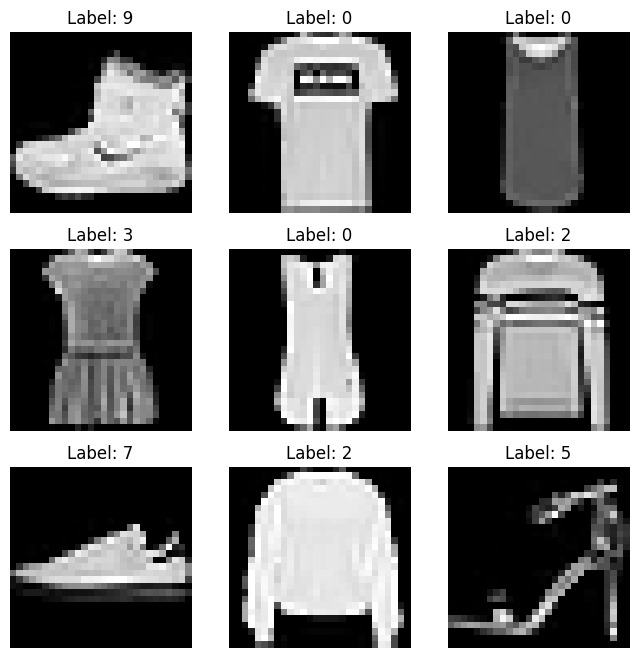

In [67]:
# --- VISUALIZE SOME SAMPLES ---
# Visualize 9 sample images from the training set to verify the data.
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(train_images[i]), cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.show()

In [79]:
train_labels.shape

(60000,)

In [80]:
to_categorical(train_labels).shape

(60000, 10)

In [107]:
# --- BUILD THE DEEP NEURAL NETWORK MODEL ---
# We create a deep learning model using tf.keras.Sequential.
# The architecture starts with:
#   - An Input layer via Flatten to convert 28x28 images to a vector.
#   - Two Dense layers to learn features.
#   - A Dropout layer for regularization.
#   - Final Dense layer with softmax activation for 10 classes.

model = tf.keras.Sequential([
    # Flatten the 28x28x1 image into a 784-dimensional vector
    tf.keras.layers.Input((28, 28, 1)),
    tf.keras.layers.Flatten(),
    
    # A fully connected layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Apply dropout with a rate of 0.2 to reduce overfitting
    tf.keras.layers.Dropout(0.2),
    
    # Output layer with 10 neurons (one for each class) and softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary to inspect the architecture
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# --- COMPILE THE MODEL ---
# Configure the model for training using:
#   - Adam optimizer with default parameters.
#   - Sparse Categorical Crossentropy loss (since labels are provided as integers).
#   - Sparse Categorical Accuracy as the evaluation metric.
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [113]:
# --- TRAIN THE MODEL ---
# Train the model using the tf.data pipeline for training data.
# We set the number of epochs (e.g., 10) and pass the validation dataset.
dnn_data = model.fit(train_images[0:5000, :, :, :], to_categorical(train_labels[0:5000]), 
                    batch_size=32, epochs=20,
                    validation_data=(test_images[0:5000, :, :, :], to_categorical(test_labels[0:5000])))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8313 - loss: 0.4844 - val_acc: 0.8250 - val_loss: 0.5138
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8457 - loss: 0.4705 - val_acc: 0.8222 - val_loss: 0.5357
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8364 - loss: 0.4825 - val_acc: 0.8084 - val_loss: 0.5631
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8480 - loss: 0.4246 - val_acc: 0.7994 - val_loss: 0.5740
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8408 - loss: 0.4288 - val_acc: 0.8068 - val_loss: 0.5922
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8527 - loss: 0.4452 - val_acc: 0.8252 - val_loss: 0.5157
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8621 - loss: 0.4202 - val_acc: 0.8186 - val_loss: 0.5543
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8632 - loss: 0.4176 - val_acc: 0.8230 - val_loss: 0.5408
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/

In [114]:
exploratory_performance = pd.DataFrame(dnn_data.history)
exploratory_performance

,acc,loss,val_acc,val_loss
0,0.8348,0.487267,0.8250,0.513773
1,0.8340,0.500925,0.8222,0.535696
2,0.8342,0.466045,0.8084,0.563078
3,0.8426,0.460442,0.7994,0.574002
4,0.8442,0.444202,0.8068,0.592200
5,0.8554,0.433949,0.8252,0.515675
6,0.8572,0.425344,0.8186,0.554283
7,0.8592,0.419513,0.8230,0.540765
8,0.8570,0.423478,0.8284,0.510410
9,0.8606,0.402165,0.8084,0.585037


<Axes: >

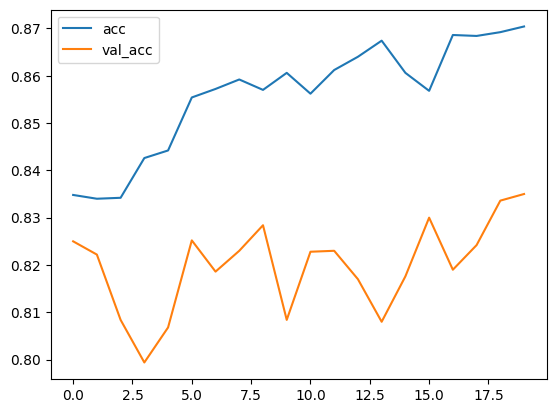

In [115]:
exploratory_performance[['acc', 'val_acc']].plot()

In [87]:
## Other ways to write your model
model = tf.keras.Sequential()

# Flatten the 28x28x1 image into a 784-dimensional vector
model.add(tf.keras.layers.Input((28, 28, 1)))
model.add(tf.keras.layers.Flatten())
    
# A fully connected layer with 128 neurons and ReLU activation
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Apply dropout with a rate of 0.2 to reduce overfitting
model.add(tf.keras.layers.Dropout(0.2))

# Output layer with 10 neurons (one for each class) and softmax activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Print the model summary to inspect the architecture
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
## Building deep neural networks
## Other ways to write your model
model = tf.keras.Sequential()

# Flatten the 28x28x1 image into a 784-dimensional vector
model.add(tf.keras.layers.Input((28, 28, 1)))
model.add(tf.keras.layers.Flatten())
    
# A fully connected layer with 128 neurons and ReLU activation
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Apply dropout with a rate of 0.2 to reduce overfitting
model.add(tf.keras.layers.Dropout(0.2))

# Output layer with 10 neurons (one for each class) and softmax activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Print the model summary to inspect the architecture
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
## Other loss functions
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [94]:
dnn_data = model.fit(train_images[0:5000, :, :, :], to_categorical(train_labels[0:5000]), 
                    batch_size=32, epochs=20,
                    validation_data=(test_images[0:5000, :, :, :], to_categorical(test_labels[0:5000])))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - acc: 0.4865 - loss: 3.2240 - val_acc: 0.7069 - val_loss: 0.9237
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - acc: 0.5900 - loss: 40.8467 - val_acc: 0.4875 - val_loss: 434.9317
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - acc: 0.4705 - loss: 1157.3733 - val_acc: 0.5059 - val_loss: 3282.6689


In [100]:
exploratory_performance = pd.DataFrame(dnn_data.history)

In [101]:
exploratory_performance

,acc,loss,val_acc,val_loss
0,0.597067,2.656511,0.7069,0.923679
1,0.516317,175.339371,0.4875,434.931702
2,0.475483,1735.355957,0.5059,3282.668945


In [ ]:
exploratory_performance[['acc', 'val_acc']].plot()

In [ ]:
# Binary Classification

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Pima Indians Diabetes dataset from Keras or a CSV file if available locally
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# Split into features and labels
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Pima Indians Diabetes Dataset:")
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Pima Indians Diabetes Dataset:
Training data shape: (614, 8)
Training labels shape: (614,)
Test data shape: (154, 8)
Test labels shape: (154,)


In [125]:
import tensorflow as tf

# Define the model for binary classification
model = tf.keras.Sequential()

# Flatten the 28x28x1 image into a 784-dimensional vector
model.add(tf.keras.layers.Input((8,)))

# Fully connected layers with ReLU activation
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
# Apply dropout with a rate of 0.2 to reduce overfitting
model.add(tf.keras.layers.Dropout(0.2))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to inspect the architecture
model.summary()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [126]:
dnn_data = model.fit(X_train, y_train, 
                    batch_size = 10, epochs = 20,
                    validation_data = (X_test, y_test))

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4896 - loss: 1.3386 - val_accuracy: 0.5390 - val_loss: 1.0883
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5179 - loss: 1.0475 - val_accuracy: 0.5909 - val_loss: 0.9466
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5621 - loss: 0.9223 - val_accuracy: 0.6234 - val_loss: 0.8488
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5913 - loss: 0.8216 - val_accuracy: 0.6364 - val_loss: 0.7813
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5546 - loss: 0.9027 - val_accuracy: 0.6558 - val_loss: 0.7306
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6207 - loss: 0.7162 - val_accuracy: 0.6688 - val_loss: 0.6992
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6459 - loss: 0.7033 - val_accuracy: 0.6883 - val_loss: 0.6721
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6592 - loss: 0.6686 - val_accuracy: 0.7013 - v

<Axes: >

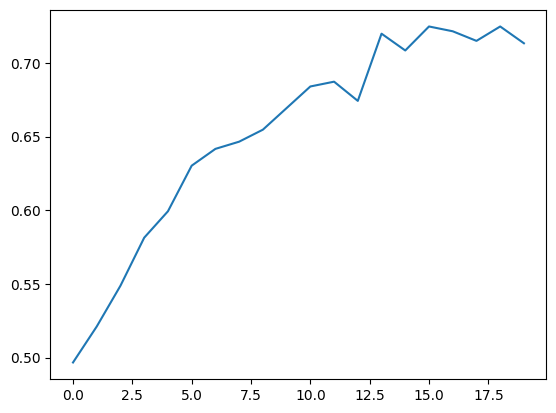

In [130]:
exploratory_performance = pd.DataFrame(dnn_data.history)
exploratory_performance['accuracy'].plot()

In [148]:
# Other ways to write your functions
from tensorflow import keras
from keras import Sequential
from keras.layers import LeakyReLU, Conv2D, Input, BatchNormalization, Activation, Dropout, Dense, MaxPool2D, Flatten, GlobalMaxPooling2D

In [136]:
# Define the model for binary classification
model = Sequential()

# Flatten the 28x28x1 image into a 784-dimensional vector
model.add(Input((8,)))

# Fully connected layers with ReLU activation
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
# Apply dropout with a rate of 0.2 to reduce overfitting
model.add(Dropout(0.2))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary_crossentropy loss and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to inspect the architecture
model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

# Section 6: Convolutional Neural Networks (CNNs) for Image Classification

In [ ]:
# Multiclass classification with mnist

In [137]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [138]:
train_images.shape

(60000, 28, 28)

In [139]:
# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [140]:
# Expand the dimensions to include a channel (for consistency with models expecting 3D images)
# Although Fashion MNIST is grayscale, some operations expect shape (batch, height, width, channels)
train_images = np.expand_dims(train_images, -1)  # New shape: (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, -1)    # New shape: (10000, 28, 28, 1)

In [153]:
test_images.shape

(10000, 28, 28, 1)

In [151]:
cnn = Sequential()
cnn.add(Input((28, 28, 1)))

cnn.add(Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
cnn.add(Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
cnn.add(MaxPool2D(2))

cnn.add(Conv2D(10, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
cnn.add(Conv2D(5, kernel_size=3, activation=LeakyReLU(alpha=0.3)))
cnn.add(MaxPool2D(2))

cnn.add(Flatten())
cnn.add(Dense(20, activation =LeakyReLU(alpha=0.3)))
cnn.add(Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 5)      │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 10)     │           460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 5)        │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 20)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,300 (12.89 KB)

 Trainable params: 3,300 (12.89 KB)

 Non-trainable params: 0 (0.00 B)

In [152]:
## Other loss functions
cnn.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [155]:
cnn_data = cnn.fit(train_images[0:5000, :, :, :], to_categorical(train_labels[0:5000]), 
                    batch_size=32, epochs=20,
                    validation_data=(test_images[0:5000, :, :, :], to_categorical(test_labels[0:5000])))

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - acc: 0.3038 - loss: 1.8990 - val_acc: 0.6754 - val_loss: 0.8296
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7157 - loss: 0.7559 - val_acc: 0.7338 - val_loss: 0.7221
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7560 - loss: 0.6542 - val_acc: 0.7390 - val_loss: 0.6938
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.7711 - loss: 0.6217 - val_acc: 0.7496 - val_loss: 0.6692
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7970 - loss: 0.5686 - val_acc: 0.7582 - val_loss: 0.6496
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7877 - loss: 0.5577 - val_acc: 0.7644 - val_loss: 0.6416
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.7956 - loss: 0.5560 - val_acc: 0.7712 - val_loss: 0.6285
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - acc: 0.8106 - loss: 0.5253 - val_acc: 0.7654 - val_loss: 0.6259
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/

<Axes: >

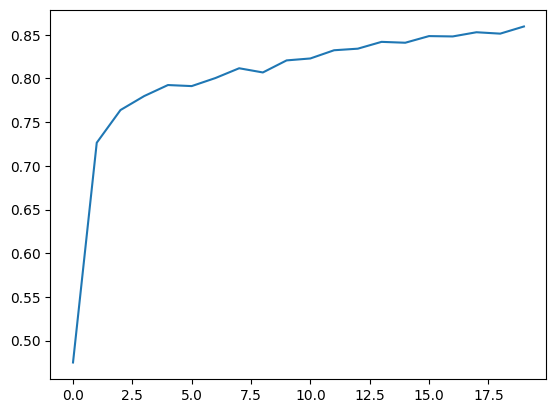

In [156]:
exploratory_performance = pd.DataFrame(cnn_data.history)
exploratory_performance['acc'].plot()

In [ ]:
## Transfer Learning option

In [157]:
from keras.applications.vgg16 import VGG16

In [158]:
conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(28, 28, 1))
# Importing images data
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32
# End Importing images data
conv_base.summary()

ValueError: The input must have 3 channels; Received `input_shape=(28, 28, 1)`

In [160]:
conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(28, 28, 3))
# End Importing images data
conv_base.summary()

ValueError: Input size must be at least 32x32; Received: input_shape=(28, 28, 3)

In [163]:
fashion_mnist = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 30s 0us/step 


In [164]:
train_images.shape

(50000, 32, 32, 3)

In [165]:
conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(32, 32, 3))
# End Importing images data
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [166]:
# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
# Expand the dimensions to include a channel (for consistency with models expecting 3D images)
# Although Fashion MNIST is grayscale, some operations expect shape (batch, height, width, channels)
train_images = np.expand_dims(train_images, -1)  # New shape: (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, -1)    # New shape: (10000, 28, 28, 1)

In [167]:
def get_images_labels_features(directory, sample_count, original_image_shape, new_image_shape, channel_type):
    '''Loads and crop the images according the appropriate conditions.
       Also, it returns the feature and labels of the VGG16 predictions'''
    
    conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(new_image_shape[0], new_image_shape[1], 3))
    last_layer = np.array(conv_base.layers[18].output_shape)    
    images = np.zeros(shape=(sample_count, new_image_shape[0], new_image_shape[1], 3))   
    features = np.zeros(shape=(sample_count, last_layer[1], last_layer[2], last_layer[3]))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size = original_image_shape,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = True,
                                            seed=0)
    i = 0
    print(generator.class_indices)
    for inputs_batch, labels_batch in generator:

        resized_images = inputs_batch
            
            
        #print(resized_images.shape)
        images[i * batch_size : (i + 1) * batch_size] = resized_images
        features_batch = conv_base.predict(resized_images)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1

        if i * batch_size >= sample_count:

             break
    return(images, labels, features)

(50000, 32, 32, 3, 1)